<h1 style='color: blue'>Financiamento a Ucrania</h1>
<hr>

<h2>Contribuição do Ocidente</h2>

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize= (14, 6))
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
data = pd.read_csv('dados/fts_incoming_funding_ukr.csv')
data.head()

,date,budgetYear,description,amountUSD,srcOrganization,srcOrganizationTypes,srcLocations,srcUsageYearStart,srcUsageYearEnd,destPlan,...,firstReportedDate,decisionDate,keywords,originalAmount,originalCurrency,exchangeRate,id,refCode,createdAt,updatedAt
0,#date,#date+year+budget,#description+notes,#value+funding+total+usd,#org+name+funder,#org+type+funder+list,#country+iso3+funder+list,#date+year+start+funder,#date+year+end+funder,#activity+appeal+name,...,#date+reported,#date+decision,#description+keywords,#value+funding+total,#value+funding+total+currency,#financial+fx,#activity+id+fts_internal,#activity+code,#date+created,#date+updated
1,2023-01-10,NaN,Improving Human Security through Community-Bas...,3920000,"Japan, Government of",Governments,JPN,2023,2023,NaN,...,2023-01-20,2023-01-10,NaN,NaN,NaN,NaN,267675,NaN,2023-01-30,2023-02-01
2,2023-01-04,NaN,OCT 10863 [OCT 10863],462962,"Japan, Government of",Governments,JPN,2023,2023,NaN,...,2023-01-06,2023-01-04,NaN,NaN,NaN,NaN,266786,OCT 10863,2023-01-13,2023-01-13
3,2023-01-04,NaN,OCT 10863 [OCT 10863];[YY/OCHA/1],2055463,"Japan, Government of",Governments,JPN,2023,2023,NaN,...,2023-01-06,2023-01-04,NaN,NaN,NaN,NaN,266791,[OCT 10863];[YY/OCHA/1],2023-01-13,2023-01-13
4,2023-01-04,NaN,Emergency and Rehabilitation Activities for Uk...,2275000,"Japan, Government of",Governments,JPN,2023,2023,NaN,...,2023-01-20,2023-01-04,NaN,NaN,NaN,NaN,267632,NaN,2023-01-30,2023-02-01


In [4]:
data['destPlan'].isnull().sum()

93

In [5]:
data['originalAmount'].isnull().sum()

39

In [6]:
data_ = data.drop(columns=['destPlan', 'refCode'])
data_ = data.drop(columns=['budgetYear'])


In [7]:
datadf = data_.drop(columns=['destPlan', 'refCode'])

In [8]:
datadf.drop(0, axis=0, inplace=True)

In [9]:
datadf.head()

,date,description,amountUSD,srcOrganization,srcOrganizationTypes,srcLocations,srcUsageYearStart,srcUsageYearEnd,destPlanCode,destPlanId,...,status,firstReportedDate,decisionDate,keywords,originalAmount,originalCurrency,exchangeRate,id,createdAt,updatedAt
1,2023-01-10,Improving Human Security through Community-Bas...,3920000,"Japan, Government of",Governments,JPN,2023,2023,NaN,NaN,...,commitment,2023-01-20,2023-01-10,NaN,NaN,NaN,NaN,267675,2023-01-30,2023-02-01
2,2023-01-04,OCT 10863 [OCT 10863],462962,"Japan, Government of",Governments,JPN,2023,2023,NaN,NaN,...,commitment,2023-01-06,2023-01-04,NaN,NaN,NaN,NaN,266786,2023-01-13,2023-01-13
3,2023-01-04,OCT 10863 [OCT 10863];[YY/OCHA/1],2055463,"Japan, Government of",Governments,JPN,2023,2023,NaN,NaN,...,commitment,2023-01-06,2023-01-04,NaN,NaN,NaN,NaN,266791,2023-01-13,2023-01-13
4,2023-01-04,Emergency and Rehabilitation Activities for Uk...,2275000,"Japan, Government of",Governments,JPN,2023,2023,NaN,NaN,...,commitment,2023-01-20,2023-01-04,NaN,NaN,NaN,NaN,267632,2023-01-30,2023-02-01
5,2022-12-30,OCT 30104 [OCT 30104];[N&#176; 12-1/8186],239872,"Estonia, Government of",Governments,EST,2022,2022,NaN,NaN,...,paid,2022-12-30,2022-12-28,NaN,225000,EUR,0.938,266415,2022-12-31,2023-01-04


In [10]:
datadf['srcUsageYearEnd'] = pd.to_datetime(datadf['srcUsageYearEnd'])
datadf['amountUSD'] = pd.to_numeric(datadf['amountUSD'])

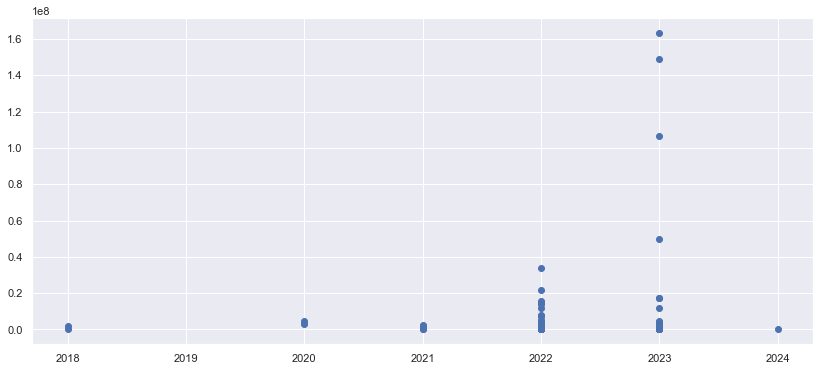

In [11]:
plt.scatter(datadf['srcUsageYearEnd'], datadf['amountUSD'])

In [12]:
datadf['date'] = pd.to_datetime(datadf['date'])

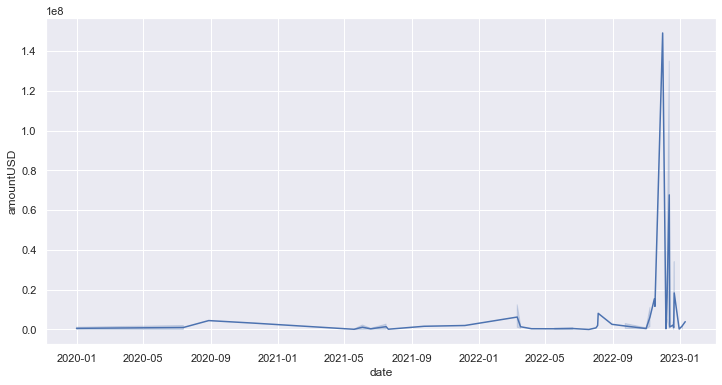

In [13]:
ax = sns.lineplot(data=datadf, x='date', y='amountUSD')
ax.figure.set_size_inches((12,6))

In [14]:
datadf['srcLocations'].isnull().sum()

29

In [15]:
datadf['srcOrganization'].unique()

array(['Japan, Government of', 'Estonia, Government of',
       'Save the Children', 'Germany, Government of',
       'France, Government of', 'United States of America, Government of',
       'United Kingdom, Government of', 'Canada, Government of',
       "European Commission's Humanitarian Aid and Civil Protection Department",
       'Belgium, Government of', 'Private (individuals & organizations)',
       'Association for Aid and Relief Japan',
       'Luxembourg, Government of', 'Norway, Government of',
       'Ireland, Government of', 'Switzerland, Government of',
       'Central Emergency Response Fund', 'European Commission',
       'Netherlands, Government of'], dtype=object)

In [16]:
datadf['srcLocations'].unique()

array(['JPN', 'EST', nan, 'DEU', 'FRA', 'USA', 'GBR', 'CAN', 'BEL', 'LUX',
       'NOR', 'IRL', 'CHE'], dtype=object)

In [17]:
datadf['srcLocations'].notnull().sum()

64

In [18]:
datadf.columns.unique()

Index(['date', 'description', 'amountUSD', 'srcOrganization',
       'srcOrganizationTypes', 'srcLocations', 'srcUsageYearStart',
       'srcUsageYearEnd', 'destPlanCode', 'destPlanId', 'destOrganization',
       'destOrganizationTypes', 'destGlobalClusters', 'destLocations',
       'destProject', 'destProjectCode', 'destEmergency', 'destUsageYearStart',
       'destUsageYearEnd', 'contributionType', 'flowType', 'method',
       'boundary', 'onBoundary', 'status', 'firstReportedDate', 'decisionDate',
       'keywords', 'originalAmount', 'originalCurrency', 'exchangeRate', 'id',
       'createdAt', 'updatedAt'],
      dtype='object')

In [19]:
datadf['destOrganization']

1              International Organization for Migration
2                             Ukraine Humanitarian Fund
3     Office for the Coordination of Humanitarian Af...
4              International Committee of the Red Cross
5     Office for the Coordination of Humanitarian Af...
                            ...                        
89                                Caritas Germany (DCV)
90                                           HALO Trust
91                                           HALO Trust
92                                           HALO Trust
93                                           HALO Trust
Name: destOrganization, Length: 93, dtype: object

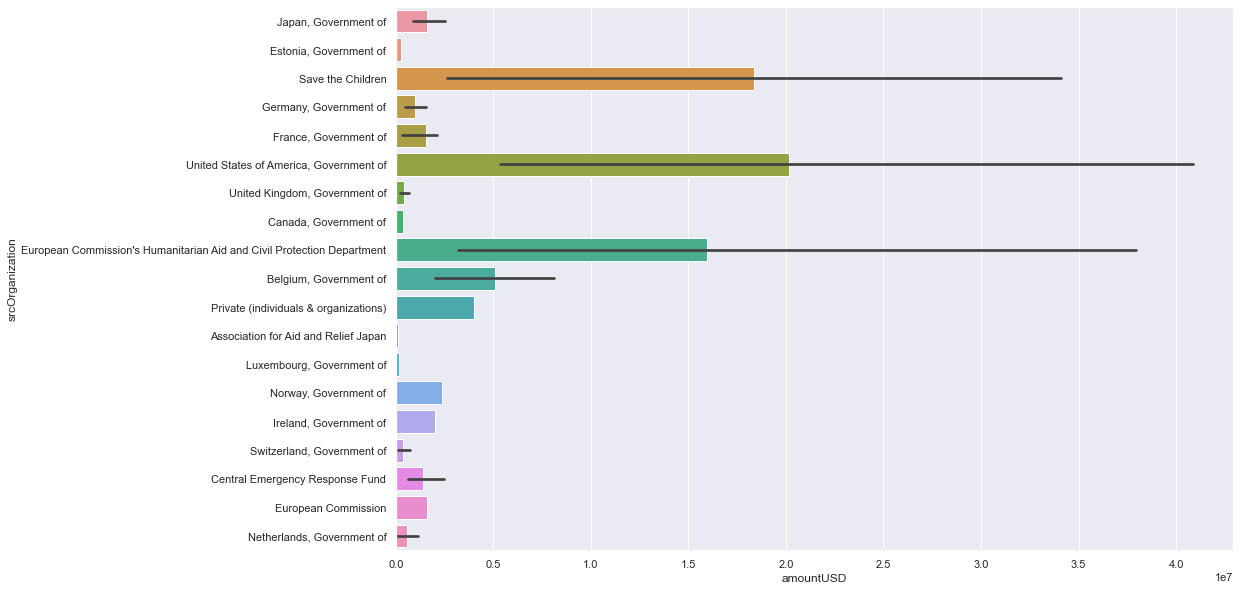

In [20]:
#matplotlib.rcParams['font.size']=14
ax= sns.barplot(x='amountUSD', y='srcOrganization', data=datadf)
ax.figure.set_size_inches(15,10)

In [21]:
datadf['amountUSD'].sum()

734227010

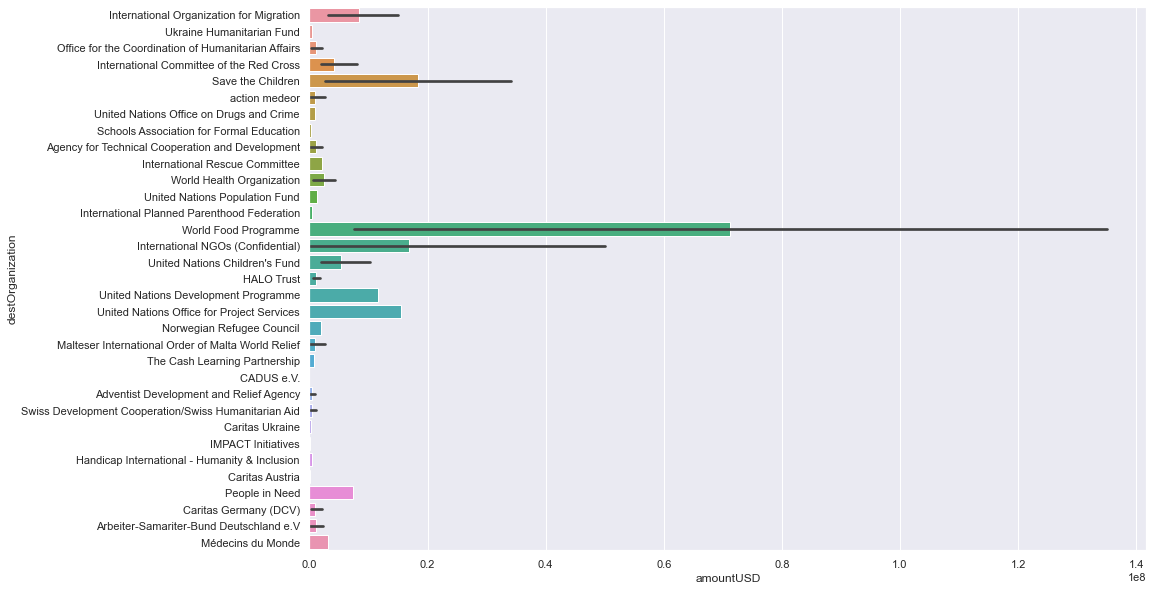

In [22]:
ax = sns.barplot(x='amountUSD', y='destOrganization', data=datadf)
ax.figure.set_size_inches(15,10)

In [23]:
import heapq

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (8).

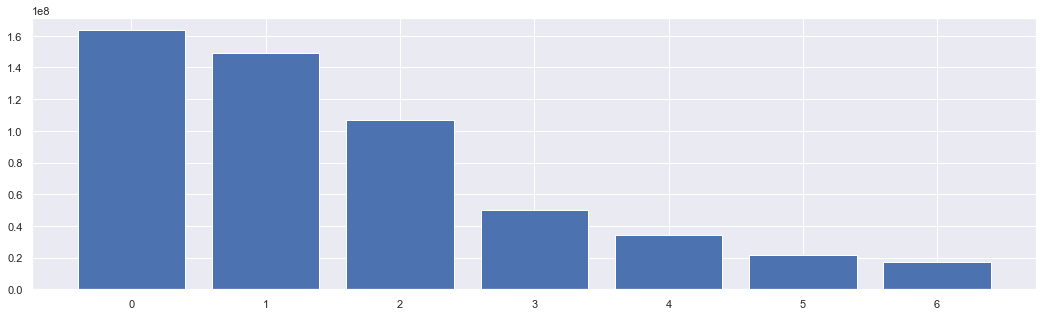

In [24]:
valores = datadf['amountUSD']
labels = datadf['srcOrganization']

top_7 = 7
total_valor = sum(valores)
valores_exprecivos = heapq.nlargest(top_7, valores)
labels_exprecivos = [labelP for valor, labelP in zip(valores, labels) if valor in valores_exprecivos]

fig, ax = plt.subplots(figsize=(18, 5))
ax.bar(range(len(valores_exprecivos)), valores_exprecivos)

ax.set_xticks(range(len(valores_exprecivos)))
ax.set_xticklabels(labels_exprecivos, rotation=90)

for i, valor in enumerate(valores):
    ax.text(i, valor + 2, f'{valor / sum(valores) * 100:.2f}%', ha='center')


plt.show()